In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import fastf1
import fastf1.plotting
from fastf1.core import Laps


fastf1.Cache.enable_cache('../cache')  # replace with your cache directory

# we only want support for timedelta plotting in this example
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)

session = fastf1.get_session(2022, 'Spanish Grand Prix', 'Q')
session.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '63', '11', '44', '77', '20', '3', '47', '4', '31', '22', '10', '24', '5', '14', '18', '23', '6']


In [5]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['LEC' 'VER' 'SAI' 'RUS' 'PER' 'HAM' 'BOT' 'MAG' 'RIC' 'MSC' 'NOR' 'OCO'
 'TSU' 'GAS' 'ZHO' 'VET' 'ALO' 'STR' 'ALB' 'LAT']


In [6]:
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [7]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

In [8]:
print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     LEC 0 days 00:01:18.750000        0 days 00:00:00
1     VER 0 days 00:01:19.073000 0 days 00:00:00.323000
2     SAI 0 days 00:01:19.166000 0 days 00:00:00.416000
3     RUS 0 days 00:01:19.393000 0 days 00:00:00.643000
4     PER 0 days 00:01:19.420000 0 days 00:00:00.670000
5     HAM 0 days 00:01:19.512000 0 days 00:00:00.762000
6     BOT 0 days 00:01:19.608000 0 days 00:00:00.858000
7     MAG 0 days 00:01:19.682000 0 days 00:00:00.932000
8     RIC 0 days 00:01:20.297000 0 days 00:00:01.547000
9     MSC 0 days 00:01:20.368000 0 days 00:00:01.618000
10    NOR 0 days 00:01:20.471000 0 days 00:00:01.721000
11    OCO 0 days 00:01:20.638000 0 days 00:00:01.888000
12    TSU 0 days 00:01:20.639000 0 days 00:00:01.889000
13    GAS 0 days 00:01:20.861000 0 days 00:00:02.111000
14    VET 0 days 00:01:20.954000 0 days 00:00:02.204000
15    ALO 0 days 00:01:21.043000 0 days 00:00:02.293000
16    ZHO 0 days 00:01:21.094000 0 days 00:00:02

In [9]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

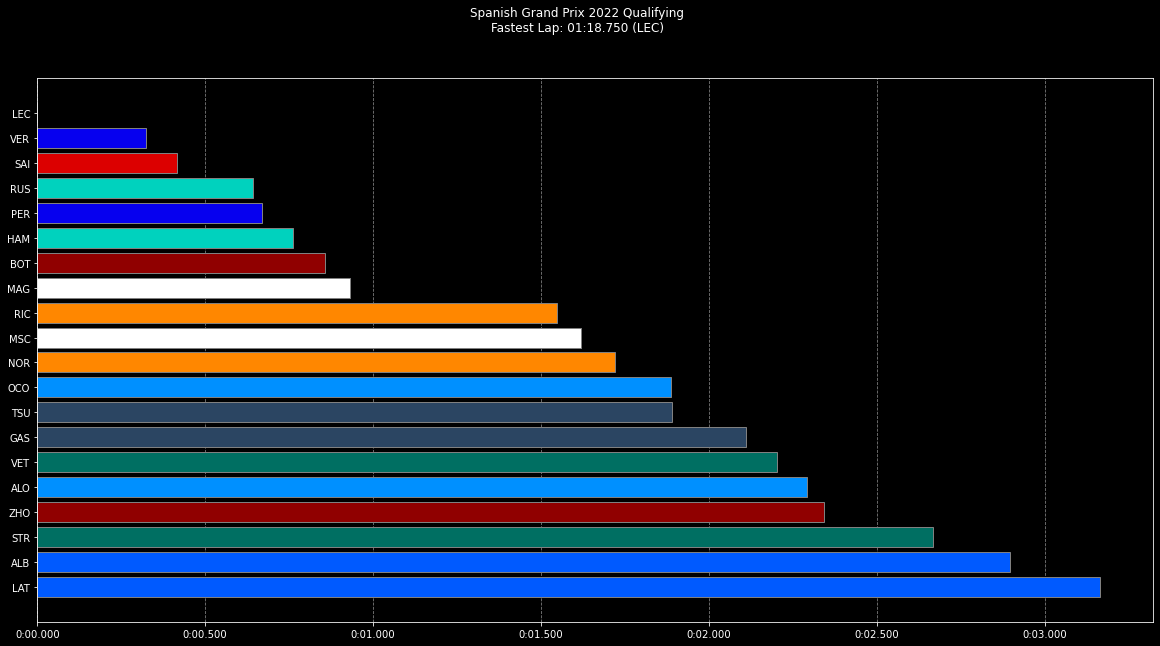

In [42]:
lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')





plt.style.use('dark_background')


fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='grey', zorder=-5000)